<a href="https://colab.research.google.com/github/rvaidya2-ksu/IT7103/blob/main/IT7103_Assignment_3_rvaidya2(target_object).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   IT 7103
*   Assignment 3
*   Rajshree Vaidya















*   Loading the data




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/A3/stroke.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.shape

(5110, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data[['stroke', 'hypertension', 'heart_disease']] = data[['stroke', 'hypertension', 'heart_disease']].astype(str)   # Since stroke, hypertension and heart disease are categorical variable, changing the data type to object.

print(data.dtypes)

id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object


In [7]:
from sklearn.model_selection import train_test_split

traindata, testdata = train_test_split(data, test_size=0.25) #test_size=0.25 means that 25% of data will be for testing, 75% for training
traindata.shape, testdata.shape

((3832, 12), (1278, 12))

In [8]:
traindata.describe()

,id,age,avg_glucose_level,bmi
count,3832.000000,3832.000000,3832.000000,3675.000000
mean,36643.472860,43.201691,105.966983,28.902259
std,21285.859187,22.612345,44.945969,7.882006
min,67.000000,0.080000,55.120000,10.300000
25%,17720.750000,25.000000,77.345000,23.600000
50%,37056.500000,45.000000,91.865000,28.000000
75%,55374.000000,61.000000,114.012500,33.100000
max,72940.000000,82.000000,271.740000,97.600000


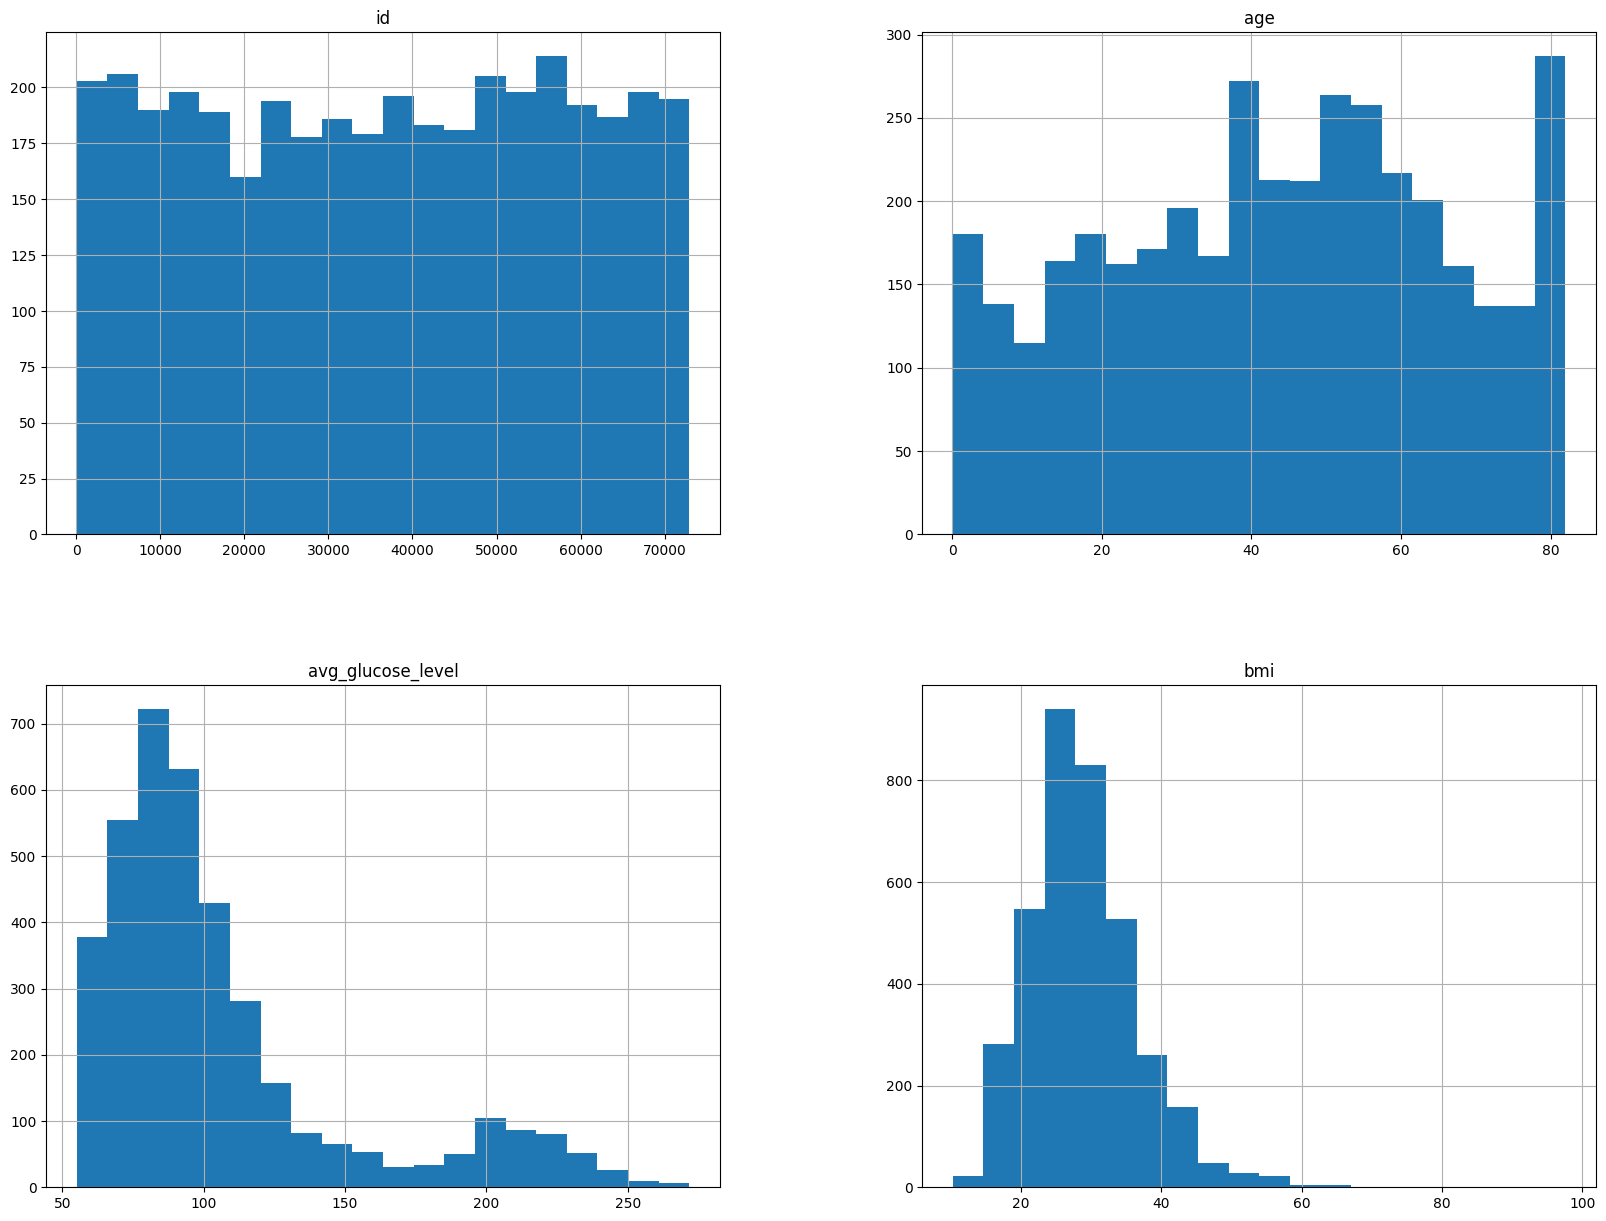

In [9]:
from matplotlib import pyplot as plt

traindata.hist(bins=20, figsize=(20,15))
plt.show()

In [10]:
num_cols = [column for column in data.columns if (traindata[column].dtypes == np.int64) or (traindata[column].dtypes == np.float64)]
num_cols.remove('id')
num_cols

['age', 'avg_glucose_level', 'bmi']

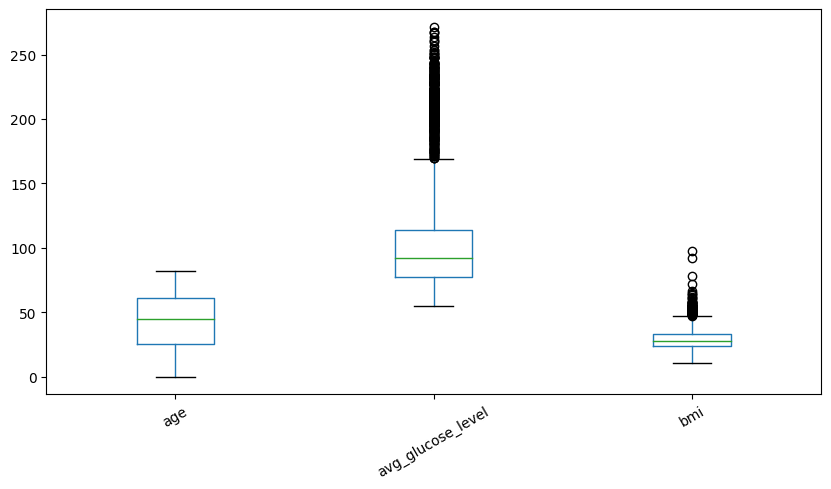

In [11]:
traindata[num_cols].boxplot(grid=False, figsize=(10,5), rot=30)
plt.show()

In [12]:
cat_cols = [column for column in traindata.columns if traindata[column].dtypes == object]
cat_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke']

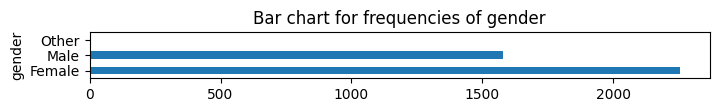

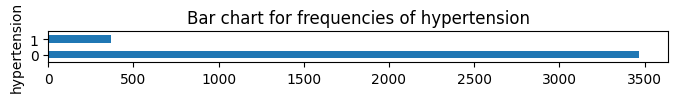

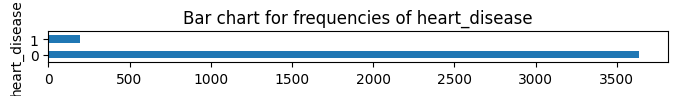

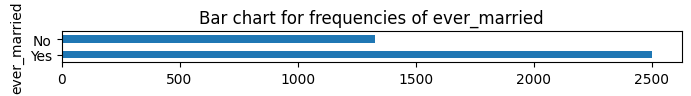

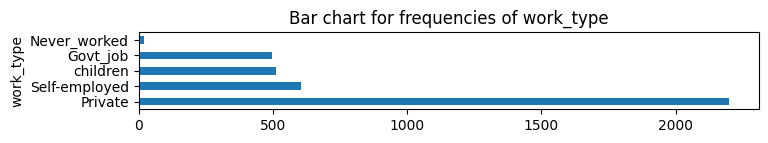

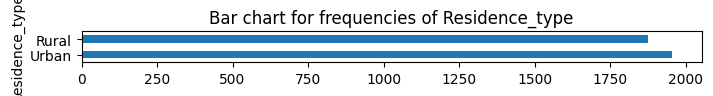

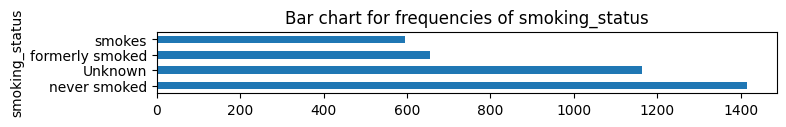

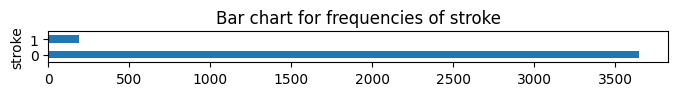

In [13]:
for col in cat_cols:
    freq_table = traindata[col].value_counts()
    plt.figure(figsize = (8,len(freq_table)*0.2)) #a bit formatting so that chart look better
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()
    print()

In [14]:

log_cols = ['age', 'avg_glucose_level', 'bmi']  # Adding bmi to log col
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
target = 'stroke'

In [15]:
#processing pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

num_pipeline = Pipeline([                           #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),   #this step will impute missing values using column medians
    ('standardize', StandardScaler())               #this step will scale all numeric columns
])

def log_transformation(x):
    return np.log(x+0.1)

log_pipeline = Pipeline([                                        #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),                #this step will impute missing values using column medians
    ('log transform', FunctionTransformer(log_transformation)), #this include a log transformation into the pipeline
    ('standardize', StandardScaler())                            #this step will scale all numeric columns
])

processing_pipeline = ColumnTransformer([                                                      #this transformer merges the processed numeric columns and class columns
    ('numeric', num_pipeline, num_cols),                                                       #numeric columns
    ('log', log_pipeline, log_cols),                                                           #log columns
    ('class', OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist'), cat_cols) #encoder to transform class columns to numeric, this will automatically handle missing data
  ])

In [16]:
processing_pipeline


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['age', 'avg_glucose_level', 'bmi']),
                                ('log',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('log transform',
                                                  FunctionTransformer(func=<function log_transformation at 0x78b454d85d80>)),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['age', 'avg_glucose_level', 'bmi']),
                                ('class',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               max_categories=5),
                                 ['gender', 'hypertension', 'heart_disease',
                                  'ever_married', 'work_type', 'Residence_type',
                                  'smoking_status'])])

Since, target variable 'stroke' is categorical therefore, it is a classification task.



Getting the Data ready for modelling by using:

*   DECISION TREE




In [17]:
from sklearn.tree import DecisionTreeClassifier

tree_pipeline = Pipeline([
    ('processing',processing_pipeline),
    ('modeling',DecisionTreeClassifier())
])


tree_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x78b454d85d80>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['gender', 'hypertension',
                                                   'heart_disease',
                                                   'ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('modeling', DecisionTreeClassifier())])


The selected model evaluation metrics are: Accuracy, Precision, Recall and F1 score.

In [18]:
from sklearn.metrics import accuracy_score
tree_pred = tree_pipeline.predict(traindata)
accuracy_score(traindata[target], tree_pred)

1.0

In [19]:
tree_pred_test = tree_pipeline.predict(testdata)
accuracy_score(testdata[target], tree_pred_test)

0.9123630672926447

In [20]:
from sklearn.metrics import precision_score
tree_pred = tree_pipeline.predict(traindata)
precision_score(traindata[target], tree_pred, pos_label='1')

1.0

In [21]:
tree_pred_test = tree_pipeline.predict(testdata)
precision_score(testdata[target], tree_pred_test, pos_label='1')

0.1506849315068493

In [22]:
from sklearn.metrics import recall_score
tree_pred = tree_pipeline.predict(traindata)
recall_score(traindata[target], tree_pred, pos_label='1')

1.0

In [23]:
tree_pred_test = tree_pipeline.predict(testdata)
recall_score(testdata[target], tree_pred_test, pos_label='1')

0.18032786885245902

In [24]:
from sklearn.metrics import f1_score
tree_pred = tree_pipeline.predict(traindata)
f1_score(traindata[target], tree_pred, pos_label='1')

1.0

In [25]:
tree_pred_test = tree_pipeline.predict(testdata)
f1_score(testdata[target], tree_pred_test, pos_label='1')

0.16417910447761194

Fine tuning decision tree model

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'max_depth': [2, 3, 4, 5],
    'max_features' : [5, 10, 15, 20],
    'min_samples_split' : [25, 50, 100, 200],
    'min_samples_leaf' : [25, 50, 100, 200]
}]

tree = DecisionTreeClassifier()

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', return_train_score=True)

tree_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('modeling tree', grid_search)
])

tree_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x78b454...
                                                  ['gender', 'hypertension',
                                                   'heart_disease',
                                                   'ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('modeling tree',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              param_grid=[{'max_depth': [2, 3, 4, 5],
                                           'max_features': [5, 10, 15, 20],
                                           'min_samples_leaf': [25, 50, 100,
                                                                200],
                                           'min_samples_split': [25, 50, 100,
                                                                 200]}],
                              return_train_score=True, scoring='accuracy'))])

Accuracy score

In [27]:
tree_pred = tree_pipeline.predict(traindata)
accuracy_score(traindata[target], tree_pred)

0.9509394572025052

In [28]:
tree_pred_test = tree_pipeline.predict(testdata)
accuracy_score(testdata[target], tree_pred_test)

0.9522691705790297

Precision score

In [29]:
tree_pred = tree_pipeline.predict(traindata)
precision_score(traindata[target], tree_pred, pos_label='1', zero_division=1)

1.0

In [30]:
tree_pred_test = tree_pipeline.predict(testdata)
precision_score(testdata[target], tree_pred_test, pos_label='1', zero_division=1)

1.0

Recall score

In [31]:
tree_pred = tree_pipeline.predict(traindata)
recall_score(traindata[target], tree_pred, pos_label='1')

0.0

In [32]:
tree_pred_test = tree_pipeline.predict(testdata)
recall_score(testdata[target], tree_pred_test, pos_label='1')

0.0

F1 score

In [33]:
tree_pred = tree_pipeline.predict(traindata)
f1_score(traindata[target], tree_pred, pos_label='1')

0.0

In [34]:
tree_pred_test = tree_pipeline.predict(testdata)
f1_score(testdata[target], tree_pred_test, pos_label='1')

0.0


*   RANDOM FOREST




In [35]:
from sklearn.ensemble import RandomForestClassifier

forest_pipeline = Pipeline([
    ('processing',processing_pipeline),
    ('modeling',RandomForestClassifier(class_weight='balanced'))
])

forest_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x78b454d85d80>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['gender', 'hypertension',
                                                   'heart_disease',
                                                   'ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('modeling', RandomForestClassifier(class_weight='balanced'))])

In [36]:
forest_pred = forest_pipeline.predict(traindata)
accuracy_score(traindata[target], forest_pred)

1.0

In [37]:
forest_pred_test = forest_pipeline.predict(testdata)
accuracy_score(testdata[target], forest_pred_test)

0.9514866979655712

In [38]:
forest_pred = forest_pipeline.predict(traindata)
precision_score(traindata[target], forest_pred, pos_label='1')

1.0

In [39]:
forest_pred = forest_pipeline.predict(testdata)
precision_score(testdata[target], forest_pred, pos_label='1')

0.0

In [40]:
forest_pred = forest_pipeline.predict(traindata)
recall_score(traindata[target], forest_pred, pos_label='1')

1.0

In [41]:
forest_pred_test = forest_pipeline.predict(testdata)
recall_score(testdata[target], forest_pred_test, pos_label='1')

0.0

In [42]:
forest_pred = forest_pipeline.predict(traindata)
f1_score(traindata[target], forest_pred, pos_label='1', zero_division=1)

1.0

In [43]:
forest_pred_test = forest_pipeline.predict(testdata)
f1_score(testdata[target], forest_pred_test, pos_label='1', zero_division=1)

0.0

Fine tuning random forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'max_depth': [2, 3, 4, 5],
    'max_features' : [5, 10, 15, 20],
    'min_samples_split' : [25, 50, 100, 200],
    'min_samples_leaf' : [25, 50, 100, 200],
    'n_estimators': [5, 10, 20, 50]
}]

forest = RandomForestClassifier()

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', return_train_score=True)

forest_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('modeling forest', grid_search)
])

forest_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x78b454...
                                                   'heart_disease',
                                                   'ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('modeling forest',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid=[{'max_depth': [2, 3, 4, 5],
                                           'max_features': [5, 10, 15, 20],
                                           'min_samples_leaf': [25, 50, 100,
                                                                200],
                                           'min_samples_split': [25, 50, 100,
                                                                 200],
                                           'n_estimators': [5, 10, 20, 50]}],
                              return_train_score=True, scoring='accuracy'))])

Accuracy score

In [45]:
forest_pred = forest_pipeline.predict(traindata)
accuracy_score(traindata[target], forest_pred)

0.9509394572025052

In [46]:
forest_pred_test = forest_pipeline.predict(testdata)
accuracy_score(testdata[target], forest_pred_test)

0.9522691705790297

Precision score

In [47]:
forest_pred = forest_pipeline.predict(traindata)
precision_score(traindata[target], forest_pred, pos_label='1', zero_division=1)

1.0

In [48]:
forest_pred_test = forest_pipeline.predict(testdata)
precision_score(testdata[target], forest_pred_test, pos_label='1', zero_division=1)

1.0

Recall score

In [ ]:
forest_pred = forest_pipeline.predict(traindata)
recall_score(traindata[target], forest_pred, pos_label='1')

0.0

In [ ]:
forest_pred_test = forest_pipeline.predict(testdata)
recall_score(testdata[target], forest_pred_test, pos_label='1')

0.0

F1 score

In [ ]:
forest_pred = forest_pipeline.predict(traindata)
f1_score(traindata[target], forest_pred, pos_label='1')

0.0

In [ ]:
forest_pred_test = forest_pipeline.predict(testdata)
f1_score(testdata[target], forest_pred_test, pos_label='1')

0.0


*   LOGISTIC REGRESSION




In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_pipeline = Pipeline([
    ('processing',processing_pipeline),
    ('modeling',LogisticRegression())
])


logistic_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x79e7200df400>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['gender', 'hypertension',
                                                   'heart_disease',
                                                   'ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('modeling', LogisticRegression())])

In [ ]:
from sklearn.metrics import accuracy_score
logistic_pred = logistic_pipeline.predict(traindata)
accuracy_score(traindata[target], logistic_pred)

0.9504175365344467

In [ ]:
logistic_pred_test = logistic_pipeline.predict(testdata)
accuracy_score(testdata[target], logistic_pred_test)

0.9538341158059468

In [ ]:
logistic_pred = logistic_pipeline.predict(traindata)
precision_score(traindata[target], logistic_pred, pos_label='1', zero_division=1)

0.5

In [ ]:
logistic_pred_test = logistic_pipeline.predict(testdata)
precision_score(testdata[target], logistic_pred_test, pos_label='1', zero_division=1)

1.0

In [ ]:
logistic_pred = logistic_pipeline.predict(traindata)
recall_score(traindata[target], logistic_pred, pos_label='1')

0.005263157894736842

In [ ]:
logistic_pred_test = logistic_pipeline.predict(testdata)
recall_score(testdata[target], logistic_pred_test, pos_label='1')

0.0

In [ ]:
logistic_pred = logistic_pipeline.predict(traindata)
f1_score(traindata[target], logistic_pred, pos_label='1')

0.010416666666666666

In [ ]:
logistic_pred_test = logistic_pipeline.predict(testdata)
f1_score(testdata[target], logistic_pred_test, pos_label='1')

0.0

Fine tuning logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression(max_iter=10000)
param_grid = [{'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', return_train_score=True)

logistic_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('modeling', grid_search)
])

logistic_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x79e720...
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['gender', 'hypertension',
                                                   'heart_disease',
                                                   'ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('modeling',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(max_iter=10000),
                              param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10,
                                                 100]}],
                              return_train_score=True, scoring='accuracy'))])

Accuracy score

In [ ]:
logistic_pred = logistic_pipeline.predict(traindata)
accuracy_score(traindata[target], logistic_pred)

0.9504175365344467

In [ ]:
logistic_pred_test = logistic_pipeline.predict(testdata)
accuracy_score(testdata[target], logistic_pred_test)

0.9538341158059468

Precision score

In [ ]:
logistic_pred = logistic_pipeline.predict(traindata)
precision_score(traindata[target], logistic_pred, pos_label='1', zero_division=1)

0.5

In [ ]:
logistic_pred_test = logistic_pipeline.predict(testdata)
precision_score(testdata[target], logistic_pred_test, pos_label='1', zero_division=1)

1.0

Recall score

In [ ]:
logistic_pred = logistic_pipeline.predict(traindata)
recall_score(traindata[target], logistic_pred, pos_label='1')

0.005263157894736842

In [ ]:
logistic_pred_test = logistic_pipeline.predict(testdata)
recall_score(testdata[target], logistic_pred_test, pos_label='1')

0.0

F1 score

In [ ]:
logistic_pred = logistic_pipeline.predict(traindata)
f1_score(traindata[target], logistic_pred, pos_label='1')

0.010416666666666666

In [ ]:
logistic_pred_test = logistic_pipeline.predict(testdata)
f1_score(testdata[target], logistic_pred_test, pos_label='1')

0.0

Conclude:

*  In Decision tree model, after fine tuning the Precision score looks perfect, i.e., 1.0
*   In Random forest model, after finetuning the  Precision score looks
perfect, i.e., 1.0
*   In Logistic regression model, after finetuning the Accuracy, score is better for both training and test, i.e., 0.95 and Precision score looks perfect for testdata which is 1.0.

